In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
trans_mutation_df = pd.read_csv('data/transmutation_df.csv')
delta_correlation_df = pd.read_csv('data/delta_correlation_df_with_significance.csv')

In [59]:
delta_correlation_df

,Gene,Delta_Correlation,P_Value,FDR,Cancer,Significant
0,A1BG,-0.198013,2.451044e-01,4.045115e-01,HNSCC,False
1,A2M,-0.118384,4.480278e-01,6.091130e-01,HNSCC,False
2,A2ML1,-0.023469,2.918125e-01,4.561968e-01,HNSCC,False
3,AAAS,0.275905,1.051756e-01,2.209072e-01,HNSCC,False
4,AACS,-0.136836,1.800586e-01,3.266475e-01,HNSCC,False
...,...,...,...,...,...,...
50684,ZWINT,1.219024,2.267627e-09,1.049863e-07,Endometrial,True
50685,ZXDC,-0.346532,2.983295e-01,5.386144e-01,Endometrial,False
50686,ZYG11B,0.768196,5.463938e-04,5.319699e-03,Endometrial,True
50687,ZYX,0.253630,2.456049e-01,4.795301e-01,Endometrial,False


In [60]:
delta_correlation_df = delta_correlation_df[delta_correlation_df.FDR < 0.05]
delta_correlation_df = delta_correlation_df[['Gene', 'Cancer', 'Delta_Correlation']]
trans_mutation_df = trans_mutation_df.drop(columns = 'Delta_Correlation')
trans_df = pd.merge(trans_mutation_df, delta_correlation_df, how = 'inner')
trans_df

,Gene,P_Value,FDR,Cancer,Mutated_Gene,Delta_Correlation
0,A1CF,0.166994,0.927123,CCRCC,PBRM1,0.140908
1,A1CF,0.904104,0.993714,CCRCC,SETD2,0.140908
2,AADAT,0.583528,0.967151,CCRCC,PBRM1,-0.340907
3,AAGAB,0.210859,0.927123,CCRCC,PBRM1,0.432618
4,AAGAB,0.601195,0.967151,CCRCC,SETD2,0.432618
...,...,...,...,...,...,...
162316,RAB40C,0.098399,0.862486,LUAD,TP53,0.418644
162317,RAB40C,0.085245,0.856123,LUAD,TTN,0.418644
162318,SCML2,0.168875,0.890597,LUAD,TP53,0.419318
162319,TNS4,0.559251,0.960600,LUAD,TP53,0.924186


In [61]:
sns.set_context(rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16, 'xtick.labelsize': 12, 'ytick.labelsize': 12}) 

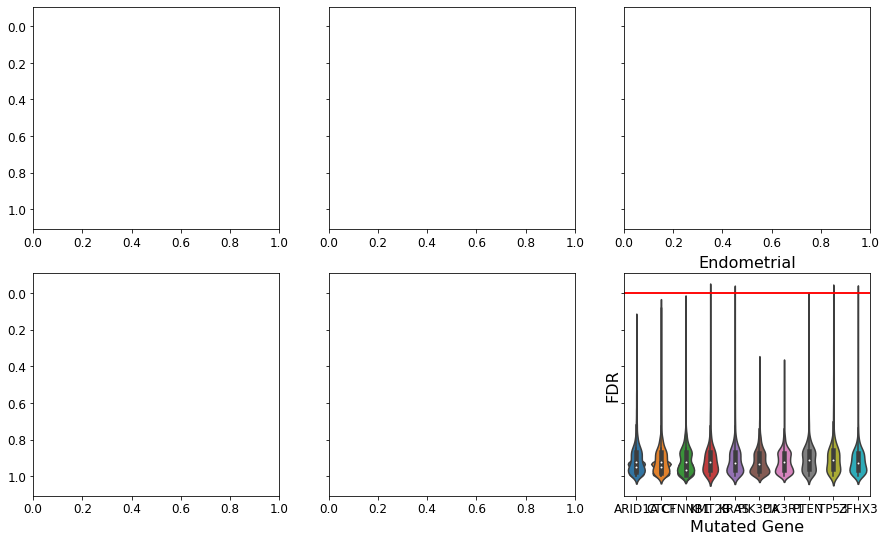

In [79]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex = False, sharey = True,
                        figsize=(15,9))


cancers = list(pd.unique(trans_df.Cancer))
for ax in axes:
    last = False
    if len(cancers) == 1:
        last = True
    if len(cancers) == 0:
        break
    cancer = cancers[0]
    cancers.remove(cancer)
    df = trans_df[trans_df.Cancer == cancer]
    ax = sns.violinplot(data = df, x = 'Mutated_Gene', y= 'FDR')
    
#     sns.stripplot(data = df, x = 'Mutated_Gene', y= 'P_Value', hue = 'Regulatory Direction', hue_order = ['Positive Delta Correlation', 'Negative Delta Correlation'], palette={'Positive Delta Correlation': 'blue', 'Negative Delta Correlation': 'red'}  )
#     sns.swarmplot(data = df, x = 'Mutated_Gene', y= 'P_Value')
    plt.axhline(y = 0.05 / len(pd.unique(df.Gene)) , color = 'r')
    plt.title(cancer)
    plt.gca().tick_params(axis = 'x', labelrotation = 90)
    ax.set_xlabel('Mutated Gene')
    if not last:
        ax.legend([],[], frameon=False)
    else:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend([],[], frameon=False)
    
ax.invert_yaxis()

# plt.legend(handles = handles, labels= labels, bbox_transform=plt.gcf().transFigure, bbox_to_anchor = (.8,.3), title= 'Regulatory Direction', loc = 'center')
# plt.subplots_adjust(hspace=.5)
#plt.tight_layout()
# plt.savefig('Figures/Figure 4) Transmutation Effects.png')
plt.show()


In [ ]:
trans_df.groupby(['Mutated_Gene', 'Cancer']).apply(lambda x: sum(x.P_Value < 0.05 / len(pd.unique(trans_df.Gene))))

ValueError: Single argument to subplot must be a three-digit integer, not <AxesSubplot:>

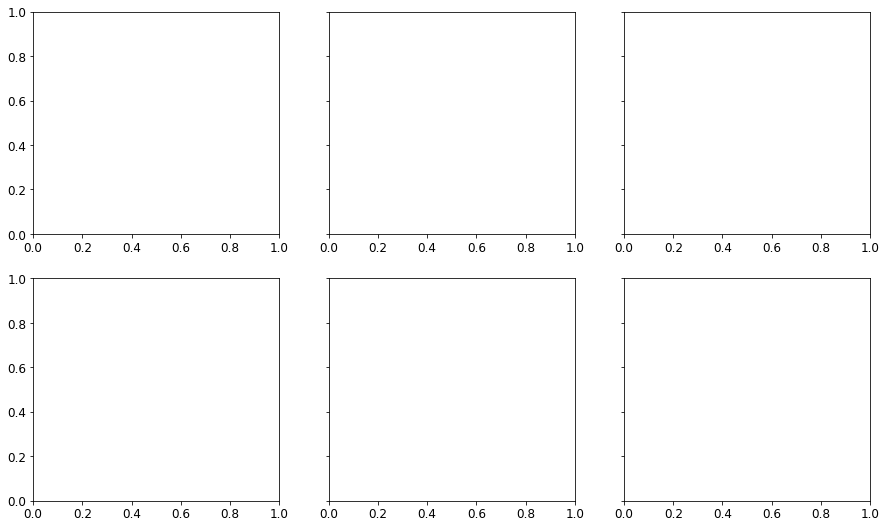

In [8]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex = False, sharey = True,
                        figsize=(15,9))
cancers = list(pd.unique(trans_df.Cancer))
for ax in axes.flatten():
    if len(cancers) == 0:
        break
    cancer = cancers[0]
    cancers.remove(cancer)
    df = trans_df[trans_df.Cancer == cancer]
    sns.violinplot(data = df, x = 'Mutated_Gene', y= 'FDR')
#     sns.stripplot(data = df, x = 'Mutated_Gene', y= 'FDR')
    #sns.swarmplot(data = df, x = 'Mutated_Gene', y= 'P_Value')
    plt.axhline(y = 0.05 , color = 'r')
    plt.title(cancer)
    plt.gca().tick_params(axis = 'x', labelrotation = 90)
    ax.set_xlabel('Mutated Gene')
ax.set_yscale('log')
fig.delaxes(axes[1][2])
fig.tight_layout()

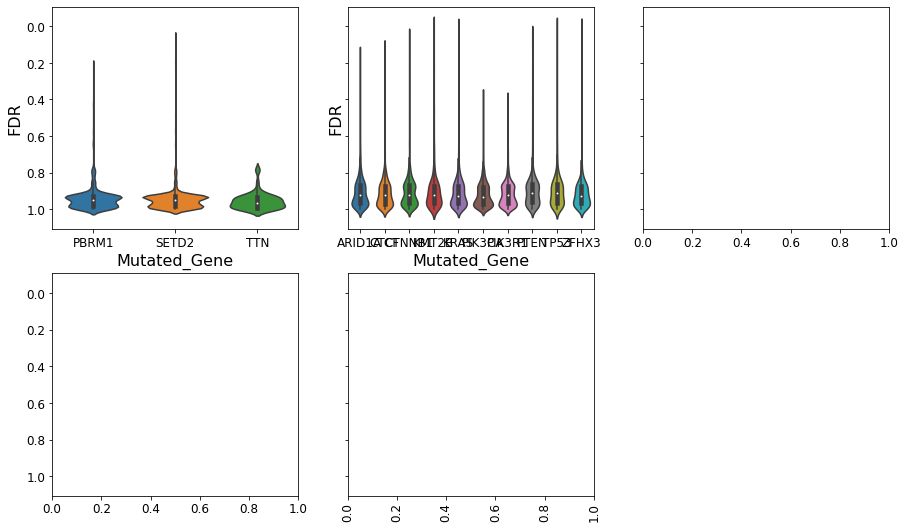

In [78]:
trans_df

fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex = False, sharey = True,
                        figsize=(15,9))
cancers = list(pd.unique(trans_df.Cancer))

df = trans_df[trans_df.Cancer == cancers[0]]
sns.violinplot(data = df, x="Mutated_Gene", y = "FDR", ax=axes[0,0])
axes[0,0].invert_yaxis()
df = trans_df[trans_df.Cancer == cancers[1]]
sns.violinplot(data = df, x="Mutated_Gene", y = "FDR", ax=axes[0,1])




In [34]:
trans_df

,Gene,P_Value,FDR,Cancer,Mutated_Gene,Delta_Correlation
0,A1CF,0.166994,0.927123,CCRCC,PBRM1,0.140908
1,A1CF,0.904104,0.993714,CCRCC,SETD2,0.140908
2,AADAT,0.583528,0.967151,CCRCC,PBRM1,-0.340907
3,AAGAB,0.210859,0.927123,CCRCC,PBRM1,0.432618
4,AAGAB,0.601195,0.967151,CCRCC,SETD2,0.432618
...,...,...,...,...,...,...
162316,RAB40C,0.098399,0.862486,LUAD,TP53,0.418644
162317,RAB40C,0.085245,0.856123,LUAD,TTN,0.418644
162318,SCML2,0.168875,0.890597,LUAD,TP53,0.419318
162319,TNS4,0.559251,0.960600,LUAD,TP53,0.924186


In [35]:
list(pd.unique(trans_df.Cancer))

['CCRCC', 'Endometrial', 'HNSCC', 'LSCC', 'LUAD']

In [36]:
df = trans_df[trans_df.Cancer == cancer]
df

,Gene,P_Value,FDR,Cancer,Mutated_Gene,Delta_Correlation
0,A1CF,0.166994,0.927123,CCRCC,PBRM1,0.140908
1,A1CF,0.904104,0.993714,CCRCC,SETD2,0.140908
2,AADAT,0.583528,0.967151,CCRCC,PBRM1,-0.340907
3,AAGAB,0.210859,0.927123,CCRCC,PBRM1,0.432618
4,AAGAB,0.601195,0.967151,CCRCC,SETD2,0.432618
...,...,...,...,...,...,...
5351,ZNHIT2,0.756397,0.982927,CCRCC,SETD2,0.454962
5352,ZRANB2,0.760973,0.983523,CCRCC,PBRM1,-0.365303
5353,ZRANB2,0.136720,0.921270,CCRCC,SETD2,-0.365303
5354,ZSCAN18,0.701074,0.975897,CCRCC,PBRM1,0.407924


<AxesSubplot:xlabel='Mutated_Gene', ylabel='FDR'>

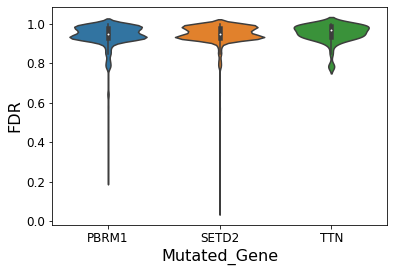

In [47]:
cancer

'Endometrial'

In [55]:
df

,Gene,P_Value,FDR,Cancer,Mutated_Gene,Delta_Correlation
5356,AACS,0.665400,0.960725,Endometrial,ARID1A,0.597777
5357,AACS,0.523876,0.938446,Endometrial,CTCF,0.597777
5358,AACS,0.605789,0.951689,Endometrial,CTNNB1,0.597777
5359,AACS,0.592937,0.949755,Endometrial,KMT2B,0.597777
5360,AACS,0.495514,0.933551,Endometrial,KRAS,0.597777
...,...,...,...,...,...,...
21406,ZYG11B,0.812781,0.979736,Endometrial,PTEN,0.768196
21407,ZYG11B,0.230221,0.873073,Endometrial,TP53,0.768196
21408,ZYG11B,0.103802,0.837411,Endometrial,ZFHX3,0.768196
21409,NDP,0.995560,0.999386,Endometrial,PIK3CA,1.372999


/var/folders/16/01vxw5fs66d9b01nlwf3w5yc0000gn/T/ipykernel_15231/580397810.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Regulatory Direction'] = df.Delta_Correlation > 0


ValueError: Single argument to subplot must be a three-digit integer, not <AxesSubplot:>

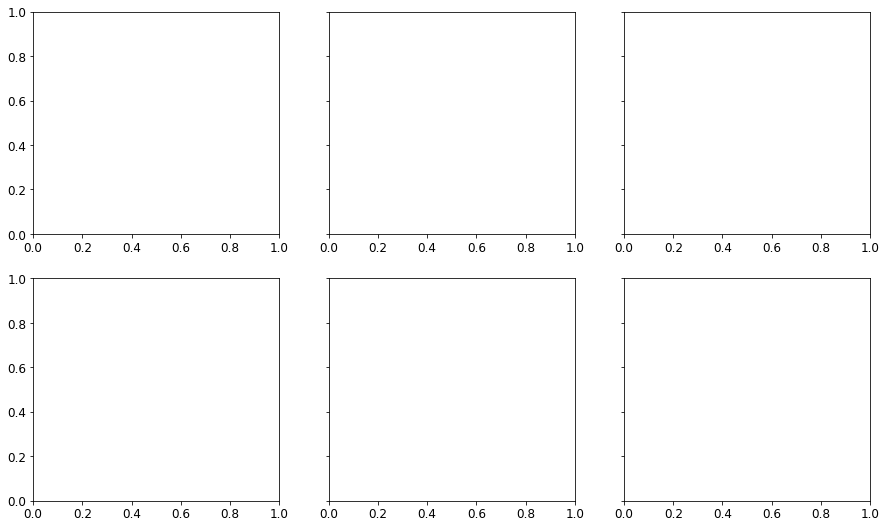

In [73]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex = False, sharey = True,
                        figsize=(15,9))
cancers = list(pd.unique(trans_df.Cancer))
for ax in axes.flatten():
    last = False
    if len(cancers) == 1:
        last = True
    if len(cancers) == 0:
        break
    cancer = cancers[0]
    cancers.remove(cancer)
    df = trans_df[trans_df.Cancer == cancer]
    df['Regulatory Direction'] = df.Delta_Correlation > 0
    df = df.replace({True: 'Positive Delta Correlation', False: 'Negative Delta Correlation'})
    plt.subplot(ax)
    #sns.violinplot(data = df, x = 'Mutated_Gene', y= 'FDR')
    sns.stripplot(data = df, x = 'Mutated_Gene', y= 'P_Value', hue = 'Regulatory Direction', hue_order = ['Positive Delta Correlation', 'Negative Delta Correlation'], palette={'Positive Delta Correlation': 'blue', 'Negative Delta Correlation': 'red'}  )
    #sns.swarmplot(data = df, x = 'Mutated_Gene', y= 'P_Value')
    plt.axhline(y = 0.05 / len(pd.unique(df.Gene)) , color = 'r')
    plt.title(cancer)
    plt.gca().tick_params(axis = 'x', labelrotation = 90)
    ax.set_xlabel('Mutated Gene')
    if not last:
        ax.legend([],[], frameon=False)
    else:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend([],[], frameon=False)
ax.invert_yaxis()

ax.set_yscale('log')
fig.delaxes(axes[1][2])
plt.legend(handles = handles, labels= labels, bbox_transform=plt.gcf().transFigure, bbox_to_anchor = (.8,.3), title= 'Regulatory Direction', loc = 'center')
plt.subplots_adjust(hspace=.5)
#plt.tight_layout()
# plt.savefig('Figures/Figure 4) Transmutation Effects.png')
plt.show()

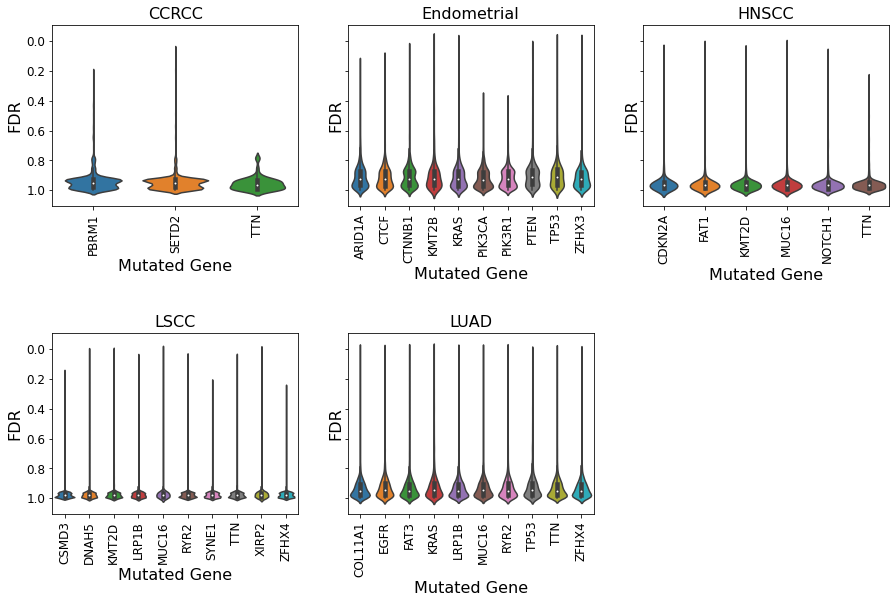

In [104]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex = False, sharey = True,
                        figsize=(15,9))

fig.delaxes(axes[1,2])
cancers = list(pd.unique(trans_df.Cancer))
for axe in axes.flatten():
    last = False
    if len(cancers) == 1:
        last = True
    if len(cancers) == 0:
        break
    cancer = cancers[0]
    cancers.remove(cancer)
    df = trans_df[trans_df.Cancer == cancer]
    sns.violinplot(data = df, x = 'Mutated_Gene', y= 'FDR', ax=axe)
    axe.set_title(cancer)
    axe.tick_params(axis='x', rotation=90)
    axe.set_xlabel('Mutated Gene')
    axe.invert_yaxis()
    
plt.subplots_adjust(hspace=.7)

In [85]:
type(axes[0,0])

matplotlib.axes._subplots.AxesSubplot

In [88]:
for ax in axes.flatten():
    print(type(ax))

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
